#  Programar y presentar los resultados mediante los algoritmos de busqueda.

    Busqueda por Amplitud

In [25]:
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

['PC', 'SF', 'CM', 'PJ']


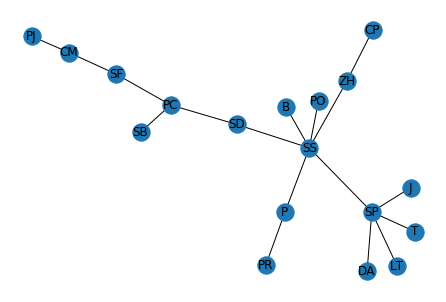

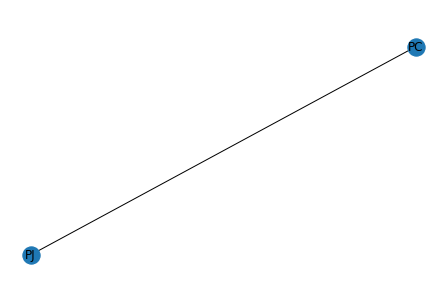

In [26]:
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'PC': {'SF', 'SD', 'SB'},
        'SF': {'CM'},
        'SD': {'SS'},
        'SB': {'PC'},
        'CM': {'PJ'},
        'PJ': {'CM'},
        'SS': {'PO', 'SP', 'B', 'P', 'ZH'},
        'PO': {'SS'},
        'SP': {'DA', 'J','T', 'LT'},
        'B': {'SS'},
        'P': {'PR'},
        'ZH': {'CP'},
        'CP': {'ZH'},
        'PR': {'P'},
        'LT': {'SP'},
        'J': {'SP'},
        'DA': {'SP'}
    }

    init_state = 'PC'
    solution = 'PJ'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")
        

    import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G1 = nx.Graph()
G1.add_nodes_from(connections)
for edge, lista in connections.items():
    for i in lista:
        G1.add_edge(edge, i)

nx.draw(G1,  with_labels = True)
plt.show()

G2 = nx.Graph()
G2.add_node(init_state)
G2.add_node(solution)
G2.add_edge(init_state, solution)
nx.draw(G2,  with_labels = True)
plt.show()

Busqueda por Coste

In [12]:
# Busqueda por costo.

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    

In [13]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

In [14]:
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'PC': {'SF':257, 'SD':196, 'SB':387},
        'SF': {'CM':1400},
        'SD': {'SS':433},
        'SB': {'PC':387},
        'CM': {'PJ':1190},
        'PJ': {'CM':1190},
        'SS': {'PO':1000, 'SP':843, 'B':405, 'P':637, 'ZH':1700},
        'PO': {'SS':1000},
        'SP': {'DA':1560, 'J':902,'T':966, 'LT':1406},
        'B': {'SS':405},
        'P': {'PR':753},
        'ZH': {'CP':742},
        'CP': {'ZH':742},
        'PR': {'P':753},
        'LT': {'SP':1406},
        'J': {'SP':902},
        'DA': {'SP':1560}
}

    init_state = 'PC'
    solution = 'PJ'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")
        
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
        
def grafico(diccionario):
    g = nx.DiGraph()
    g.add_nodes_from(diccionario)
    for valor, listaValor in diccionario.items():
        for a in listaValor:
            g.add_edge(valor,a,size=250,length=str(listaValor[a]))
    
    posicion = nx.spring_layout(g)
    plt.figure(figsize=(20,20)) 
    labels = nx.get_edge_attributes(g,'length')
    nx.draw_networkx(g, posicion, node_color = 'green', with_labels = True, node_size=3000)
    nx.draw_networkx_edge_labels(g,posicion,edge_labels=labels,font_color='red',font_size=12)
    plt.show()
      
grafico(connections)

KeyError: 'T'

Busqueda Por Profundidad

In [9]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [10]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


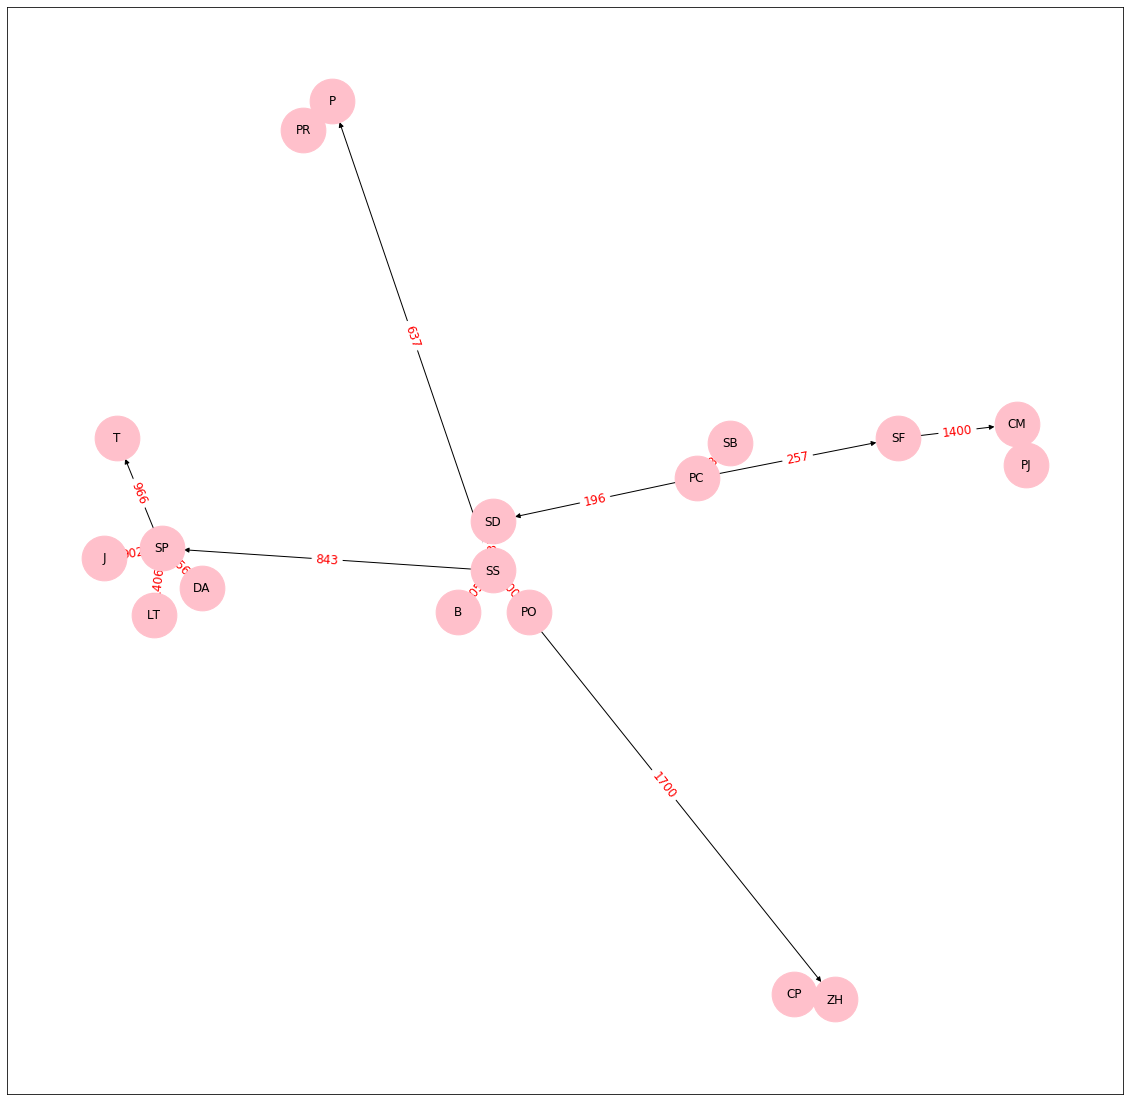

In [11]:
# Implementar
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

connections = {
       'PC': {'SF':257, 'SD':196, 'SB':387},
        'SF': {'CM':1400},
        'SD': {'SS':433},
        'SB': {'PC':387},
        'CM': {'PJ':1190},
        'PJ': {'CM':1190},
        'SS': {'PO':1000, 'SP':843, 'B':405, 'P':637, 'ZH':1700},
        'PO': {'SS':1000},
        'SP': {'DA':1560, 'J':902,'T':966, 'LT':1406},
        'B': {'SS':405},
        'P': {'PR':753},
        'ZH': {'CP':742},
        'CP': {'ZH':742},
        'PR': {'P':753},
        'LT': {'SP':1406},
        'J': {'SP':902},
        'DA': {'SP':1560}
}

def grafico(diccionario):
    g = nx.DiGraph()
    g.add_nodes_from(diccionario)
    for valor, valores in diccionario.items():
        for a in valores:
            g.add_edge(valor,a,size=250,length=str(valores[a]))
    
    posicion = nx.spring_layout(g)
    plt.figure(figsize=(20,20)) 
    labels = nx.get_edge_attributes(g,'length')
    nx.draw_networkx(g, posicion, node_color = 'pink', with_labels = True, node_size=2000)
    nx.draw_networkx_edge_labels(g,posicion,edge_labels=labels,font_color='red',font_size=12)
    plt.show()
      
grafico(connections)